# 請結合前面的知識與程式碼，比較不同的 optimizer 與 learning rate 組合對訓練的結果與影響
### 常見的 optimizer 包含
* SGD
* RMSprop
* AdaGrad
* Adam

In [11]:
import os
import keras
import itertools

# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [7]:
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [9]:
## 超參數設定
"""
Set your required experiment parameters
"""
LEARNING_RATE = [1e-1, 1e-2, 1e-3]
EPOCHS = 50
BATCH_SIZE = 256
OPTIMIZER = [keras.optimizers.SGD, keras.optimizers.RMSprop, keras.optimizers.Adagrad, keras.optimizers.Adam]


In [16]:
results = {}
"""
建立你的訓練與實驗迴圈並蒐集資料
"""

for lr, opti in itertools.product(LEARNING_RATE, OPTIMIZER):
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with LR = %.6f" % (lr))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = opti(lr=lr)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = "exp-lr-%s-optimizer-%s" % (str(lr), str(opti))
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

Experiment with LR = 0.100000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [============================

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 21s 425us/step - loss: 14.4454 - acc: 0.1001 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 2/50
50000/50000 [==============================] - 21s 415us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 3/50
50000/50000 [==============================] - 22s 440us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 4/50
50000/50000 [==============================] - 21s 426us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 5/50
50000/50000 [==============================] - 20s 409us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 6/50
50000/50000 [==============================] - 20s 409us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 7/50
50000/50000 [==============================] - 20s 401us/step - loss: 14.5063 - acc: 0.1000 -

50000/50000 [==============================] - 19s 370us/step - loss: 14.4459 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 2/50
50000/50000 [==============================] - 18s 364us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 3/50
50000/50000 [==============================] - 18s 364us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 4/50
50000/50000 [==============================] - 18s 365us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 5/50
50000/50000 [==============================] - 18s 366us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 6/50
50000/50000 [==============================] - 18s 368us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 7/50
50000/50000 [==============================] - 18s 369us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 8/50
50000/50000 [

50000/50000 [==============================] - 26s 511us/step - loss: 14.4451 - acc: 0.0999 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 2/50
50000/50000 [==============================] - 26s 518us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 3/50
50000/50000 [==============================] - 26s 512us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 4/50
50000/50000 [==============================] - 18s 354us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 5/50
50000/50000 [==============================] - 17s 340us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 6/50
50000/50000 [==============================] - 17s 336us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 7/50
50000/50000 [==============================] - 24s 489us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 8/50
50000/50000 [

50000/50000 [==============================] - 16s 318us/step - loss: 2.0548 - acc: 0.2671 - val_loss: 1.9362 - val_acc: 0.3201
Epoch 2/50
50000/50000 [==============================] - 21s 426us/step - loss: 1.8796 - acc: 0.3381 - val_loss: 1.8893 - val_acc: 0.3306
Epoch 3/50
50000/50000 [==============================] - 21s 430us/step - loss: 1.8191 - acc: 0.3582 - val_loss: 1.7953 - val_acc: 0.3678
Epoch 4/50
50000/50000 [==============================] - 21s 430us/step - loss: 1.7765 - acc: 0.3747 - val_loss: 1.7753 - val_acc: 0.3654
Epoch 5/50
50000/50000 [==============================] - 17s 345us/step - loss: 1.7342 - acc: 0.3916 - val_loss: 1.7380 - val_acc: 0.3898
Epoch 6/50
50000/50000 [==============================] - 12s 248us/step - loss: 1.7096 - acc: 0.3994 - val_loss: 1.7073 - val_acc: 0.3995
Epoch 7/50
50000/50000 [==============================] - 14s 285us/step - loss: 1.6780 - acc: 0.4105 - val_loss: 1.6694 - val_acc: 0.4118
Epoch 8/50
50000/50000 [==============

Epoch 2/50
50000/50000 [==============================] - 24s 479us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 3/50
50000/50000 [==============================] - 18s 358us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 4/50
50000/50000 [==============================] - 16s 313us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 5/50
50000/50000 [==============================] - 16s 316us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 6/50
50000/50000 [==============================] - 22s 449us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 7/50
50000/50000 [==============================] - 25s 491us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 8/50
50000/50000 [==============================] - 27s 538us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 9/50
50

50000/50000 [==============================] - 14s 287us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 3/50
50000/50000 [==============================] - 14s 273us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 4/50
50000/50000 [==============================] - 15s 300us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 5/50
50000/50000 [==============================] - 21s 430us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 6/50
50000/50000 [==============================] - 23s 458us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 7/50
50000/50000 [==============================] - 23s 458us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 8/50
50000/50000 [==============================] - 17s 346us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 9/50
50000/50000 [

50000/50000 [==============================] - 25s 509us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 3/50
50000/50000 [==============================] - 18s 353us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 4/50
50000/50000 [==============================] - 16s 312us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 5/50
50000/50000 [==============================] - 16s 325us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 6/50
50000/50000 [==============================] - 24s 471us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 7/50
50000/50000 [==============================] - 26s 522us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 8/50
50000/50000 [==============================] - 24s 480us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 9/50
50000/50000 [

50000/50000 [==============================] - 22s 432us/step - loss: 2.2043 - acc: 0.2138 - val_loss: 2.1813 - val_acc: 0.2305
Epoch 3/50
50000/50000 [==============================] - 20s 393us/step - loss: 2.1564 - acc: 0.2374 - val_loss: 2.1358 - val_acc: 0.2466
Epoch 4/50
50000/50000 [==============================] - 13s 266us/step - loss: 2.1121 - acc: 0.2517 - val_loss: 2.0933 - val_acc: 0.2642
Epoch 5/50
50000/50000 [==============================] - 12s 243us/step - loss: 2.0711 - acc: 0.2709 - val_loss: 2.0539 - val_acc: 0.2813
Epoch 6/50
50000/50000 [==============================] - 13s 257us/step - loss: 2.0337 - acc: 0.2876 - val_loss: 2.0199 - val_acc: 0.2903
Epoch 7/50
50000/50000 [==============================] - 16s 324us/step - loss: 2.0015 - acc: 0.3019 - val_loss: 1.9895 - val_acc: 0.3134
Epoch 8/50
50000/50000 [==============================] - 22s 436us/step - loss: 1.9741 - acc: 0.3140 - val_loss: 1.9641 - val_acc: 0.3197
Epoch 9/50
50000/50000 [==============

50000/50000 [==============================] - 16s 324us/step - loss: 1.8874 - acc: 0.3191 - val_loss: 1.8183 - val_acc: 0.3284
Epoch 3/50
50000/50000 [==============================] - 14s 287us/step - loss: 1.7788 - acc: 0.3610 - val_loss: 1.8167 - val_acc: 0.3601
Epoch 4/50
50000/50000 [==============================] - 15s 301us/step - loss: 1.7133 - acc: 0.3860 - val_loss: 2.1770 - val_acc: 0.2862
Epoch 5/50
50000/50000 [==============================] - 21s 428us/step - loss: 1.6559 - acc: 0.4093 - val_loss: 1.7384 - val_acc: 0.3573
Epoch 6/50
50000/50000 [==============================] - 24s 477us/step - loss: 1.6136 - acc: 0.4224 - val_loss: 1.7470 - val_acc: 0.3732
Epoch 7/50
50000/50000 [==============================] - 25s 492us/step - loss: 1.5722 - acc: 0.4382 - val_loss: 1.6078 - val_acc: 0.4327
Epoch 8/50
50000/50000 [==============================] - 20s 397us/step - loss: 1.5377 - acc: 0.4503 - val_loss: 1.6751 - val_acc: 0.4119
Epoch 9/50
50000/50000 [==============

Epoch 3/50
50000/50000 [==============================] - 17s 342us/step - loss: 1.7220 - acc: 0.3950 - val_loss: 1.7136 - val_acc: 0.4006
Epoch 4/50
50000/50000 [==============================] - 23s 461us/step - loss: 1.6752 - acc: 0.4133 - val_loss: 1.6642 - val_acc: 0.4114
Epoch 5/50
50000/50000 [==============================] - 23s 463us/step - loss: 1.6432 - acc: 0.4232 - val_loss: 1.6406 - val_acc: 0.4234
Epoch 6/50
50000/50000 [==============================] - 17s 350us/step - loss: 1.6154 - acc: 0.4351 - val_loss: 1.6428 - val_acc: 0.4201
Epoch 7/50
50000/50000 [==============================] - 14s 275us/step - loss: 1.5941 - acc: 0.4408 - val_loss: 1.6111 - val_acc: 0.4271
Epoch 8/50
50000/50000 [==============================] - 14s 277us/step - loss: 1.5737 - acc: 0.4510 - val_loss: 1.6090 - val_acc: 0.4263
Epoch 9/50
50000/50000 [==============================] - 15s 309us/step - loss: 1.5547 - acc: 0.4568 - val_loss: 1.5742 - val_acc: 0.4454
Epoch 10/50
50000/50000 [==

Epoch 4/50
50000/50000 [==============================] - 26s 524us/step - loss: 1.5566 - acc: 0.4439 - val_loss: 1.5466 - val_acc: 0.4527
Epoch 5/50
50000/50000 [==============================] - 19s 371us/step - loss: 1.5071 - acc: 0.4636 - val_loss: 1.4922 - val_acc: 0.4725
Epoch 6/50
50000/50000 [==============================] - 16s 315us/step - loss: 1.4627 - acc: 0.4766 - val_loss: 1.4740 - val_acc: 0.4779
Epoch 7/50
50000/50000 [==============================] - 16s 317us/step - loss: 1.4329 - acc: 0.4887 - val_loss: 1.5169 - val_acc: 0.4625
Epoch 8/50
50000/50000 [==============================] - 22s 434us/step - loss: 1.4090 - acc: 0.4963 - val_loss: 1.4606 - val_acc: 0.4788
Epoch 9/50
50000/50000 [==============================] - 26s 521us/step - loss: 1.3738 - acc: 0.5118 - val_loss: 1.4021 - val_acc: 0.5075
Epoch 10/50
50000/50000 [==============================] - 24s 478us/step - loss: 1.3490 - acc: 0.5218 - val_loss: 1.4449 - val_acc: 0.4865
Epoch 11/50
50000/50000 [=

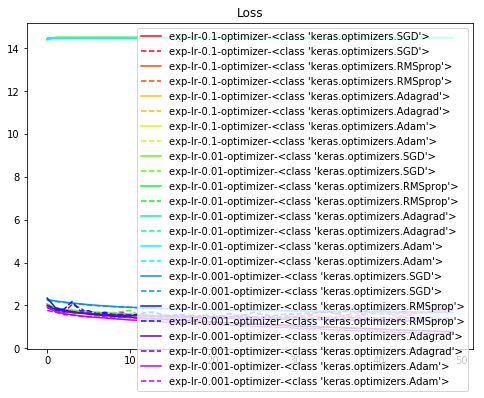

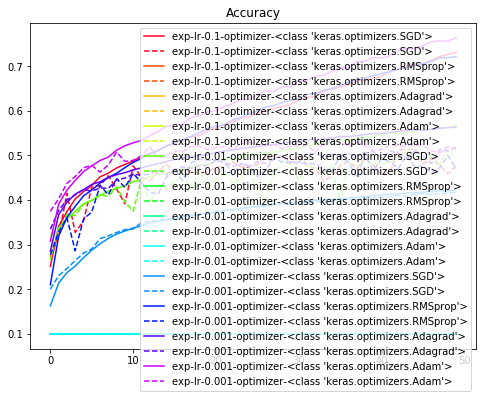

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline
"""
將實驗結果繪出
"""
NUM_COLORS = len(results.keys())
cm = plt.get_cmap('gist_rainbow')
color_bar = [cm(1.*i/NUM_COLORS) for i in range(NUM_COLORS)]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()